# **주식_뉴스_원문_20년 9월 10월**

### 파일 읽기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("news_article_Naver_stock_20_910.csv")
df_data = str(np.array(df['contents'].tolist()))
print(type(df_data))

<class 'str'>


### 토크나이즈

In [2]:
from konlpy.tag import Okt

t = Okt()
tokens = t.morphs(df_data)
print(len(tokens))

269761


### 품사 태깅

In [3]:
print(t.pos(df_data)[:300])

[('["[\'\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('t', 'Alpha'), ('\\\\', 'Punctuation'), ('n', 'Alpha'), ('\\\\', 'Punctuation'), ('t', 'Alpha'), ('[', 'Punctuation'), ('경향신문', 'Noun'), (']', 'Punctuation'), ('2030', 'Number'), ('세대', 'Noun'), ('의', 'Josa'), ('주식', 'Noun'), ('열풍', 'Noun'), ('에', 'Josa'), ('사회', 'Noun'), ('적', 'Suffix'), ('으로', 'Josa'), ('우려', 'Noun'), ('의', 'Josa'), ('시선', 'Noun'), ('이', 'Josa'), ('쏟아진다', 'Verb'), ('.', 'Punctuation'), ('동학', 'Noun'), ('개미', 'Noun'), ('운동', 'Noun'), ('이라는', 'Josa'), ('짧고', 'Adjective'), ('강렬한', 'Adjective'), ('경험', 'Noun'), ('을', 'Josa'), ('거치', 'Noun'), ('며', 'Josa'), ('시장', 'Noun'), ('을', 'Josa'), ('너무', 'Adverb'), ('만만하게', 'Adjective'), ('보게', 'Verb'), ('된', 'Verb'), ('것', 'Noun'), ('아니냐는', 'Adjective'), ('것', 'Noun'), ('이다', 'Josa'), ('.', 'Punctu

In [4]:
my_words = t.nouns(df_data)

print(len(my_words))
print(my_words[:100])

121075
['경향신문', '세대', '주식', '열풍', '사회', '우려', '시선', '동학', '개미', '운동', '경험', '거치', '시장', '것', '것', '투자자', '절망', '케', '닷컴버블', '세대', '기억', '기도', '동학', '개미', '운동', '합류', '청년', '투자자', '장기', '투자자', '조건', '지난', '증권', '업계', '시장', '흥망', '김학균', '증권', '리서치', '센터', '최근', '지금', '증시', '버블', '인지', '버블', '하자', '주식', '모름', '철학', '이란', '말', '미래', '예측', '수', '무엇', '투자', '김', '센터', '개별', '종목', '경기', '예측', '돈', '성격', '이', '투자', '패', '좌우', '고', '위기', '수', '돈', '투자', '손실', '면', '간혹', '수익', '낼', '수', '얘기', '지난달', '김', '센터', '여러', '번의', '통화', '인터뷰', '보완', '내용', '문답', '전', '김학균', '증권', '리서치', '센터', '지난달', '서울', '여의도', '증권']


In [5]:
money = [word for word in my_words if word == '돈']
money_dict = {}
for word in money:
    money_dict[word] = money_dict.get(word, 0) + 1

for key in money_dict:
    print(f'{repr(key)} : {money_dict[key]}')
    print()

'돈' : 433



### 불용어 제거

In [6]:
tokens =  [word for word in my_words if len(word) > 1]
print(tokens[:300])

['경향신문', '세대', '주식', '열풍', '사회', '우려', '시선', '동학', '개미', '운동', '경험', '거치', '시장', '투자자', '절망', '닷컴버블', '세대', '기억', '기도', '동학', '개미', '운동', '합류', '청년', '투자자', '장기', '투자자', '조건', '지난', '증권', '업계', '시장', '흥망', '김학균', '증권', '리서치', '센터', '최근', '지금', '증시', '버블', '인지', '버블', '하자', '주식', '모름', '철학', '이란', '미래', '예측', '무엇', '투자', '센터', '개별', '종목', '경기', '예측', '성격', '투자', '좌우', '위기', '투자', '손실', '간혹', '수익', '얘기', '지난달', '센터', '여러', '번의', '통화', '인터뷰', '보완', '내용', '문답', '김학균', '증권', '리서치', '센터', '지난달', '서울', '여의도', '증권', '본사', '경향신문', '인터뷰', '권도현', '기자', '기사', '보기', '젊음', '가장', '자산', '시간', '감당', '주식', '열풍', '정말', '과거', '대학생', '주식', '투자', '보고', '걱정', '목소리', '청년', '세대', '투자', '생각', '듭니', '주식', '투자', '생각', '금리', '적금', '다른', '선택', '합리', '이지', '다른', '자산군', '주식', '투자', '보시', '이유', '뭔가', '소액', '수가', '주주', '기업', '도우', '면서', '방법', '기업', '주식', '사면', '기업', '직원', '위해', '이전', '주식', '열풍', '지금', '쓰시', '주식', '열풍', '기사', '신문', '바이', '코리아', '펀드', '인사이트', '펀드', '주식', '펀드', '유행', '이후', '주식', '투자', '열풍', '로부터', '주식', '

In [10]:
stop_words = ['가장', '때문', '통해', '대해', '위해', '관련', '정도', '지금', '최근',
             '다른', '지금', '라며', '하나', '지난', '이상', '사진', '우리', '사실',
             '경우', '크게', '오후', '하루', '이후', '올해', '확인', '결과', '모두',
             '하우스', '이번', '현재', '이유', '사례', '심사', '진행', '특급', '여러',
             '위원', '가지', '자신', '보고', '회장', '기자']

my_words = [word for word in tokens if word not in stop_words]

### 빈도수 사전

In [11]:
article_dict = {}

for word in my_words:
    article_dict[word] = article_dict.get(word, 0) + 1

article_dict['돈'] = 462
sorted_dict = sorted(article_dict, key=article_dict.get, reverse=True)

for key in sorted_dict[:100]:
    print(f'{repr(key)} : {article_dict[key]}')
    print()

'투자' : 1369

'주식' : 1293

'사람' : 523

'돈' : 462

'투자자' : 430

'생각' : 409

'한국' : 401

'코로나' : 399

'경제' : 377

'대표' : 368

'대학생' : 363

'세대' : 341

'기업' : 333

'뉴스' : 328

'배달' : 325

'청년' : 297

'대한' : 287

'경기도' : 282

'시장' : 280

'개인' : 254

'서울' : 247

'미국' : 238

'의원' : 233

'대상' : 230

'시작' : 229

'문제' : 224

'대출' : 219

'증권' : 213

'이야기' : 212

'정부' : 203

'운영' : 199

'거래' : 198

'주가' : 196

'사회' : 193

'네이버' : 193

'금지' : 193

'부동산' : 190

'무단' : 190

'회사' : 187

'상황' : 186

'배포' : 184

'개미' : 178

'국내' : 172

'문화' : 166

'서비스' : 166

'지원' : 160

'미래' : 158

'금융' : 158

'구독' : 158

'수출' : 158

'선정' : 157

'주식회사' : 155

'수익' : 154

'전문가' : 151

'사업' : 149

'명칭' : 149

'자산' : 148

'국민' : 148

'해외' : 146

'가격' : 144

'자금' : 144

'빚투' : 143

'지역' : 140

'학교' : 139

'종목' : 138

'유튜브' : 136

'장관' : 134

'시간' : 131

'과정' : 129

'조사' : 128

'세계' : 127

'금리' : 126

'학생' : 125

'주식시장' : 125

'기준' : 124

'채널' : 124

'교육' : 122

'설명' : 120

'대학' : 120

'예정' : 120

'수준' : 119

'최종' : 119

'

### 워드 클라우드

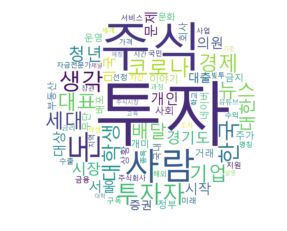

In [12]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from PIL import Image

font_path = 'c:/Windows/Fonts/malgun.ttf'
image = np.array(Image.open('circle.png'))

wc = WordCloud(
    font_path = font_path,
    width = 800,
    height = 400,
    mask = image,
    background_color = 'white',
    max_words = 80)

wc.generate_from_frequencies(article_dict)

wc.to_file('article_stock_20_910.png')

plt.figure()
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()